In [209]:
import pandas as pd
df = pd.read_csv('SMSSpamCollection.csv', sep='¤', engine='python')
pd.set_option('display.max_colwidth', None)
df[2202:2215].style.set_properties(**{'text-align': 'left'})

,CATEGORY,SMS
2202,ham,A boy was late 2 home. His father: POWER OF FRNDSHIP
2203,ham,"(And my man carlos is definitely coming by mu tonight, no excuses)"
2204,ham,soon you will have the real thing princess! Do i make you wet? :)
2205,ham,Raji..pls do me a favour. Pls convey my Birthday wishes to Nimya. Pls. Today is her birthday.
2206,ham,"Haha, my legs and neck are killing me and my amigos are hoping to end the night with a burn, think I could swing by in like an hour?"
2207,spam,"URGENT! Your mobile No 07xxxxxxxxx won a £2,000 bonus caller prize on 02/06/03! this is the 2nd attempt to reach YOU! call 09066362231 ASAP! BOX97N7QP, 150PPM"
2208,ham,Usually the body takes care of it buy making sure it doesnt progress. Can we pls continue this talk on saturday.
2209,spam,"URGENT!! Your 4* Costa Del Sol Holiday or £5000 await collection. Call 09050090044 Now toClaim. SAE, TC s, POBox334, Stockport, SK38xh, Cost£1.50/pm, Max10mins"
2210,ham,"Hmm well, night night"
2211,ham,Just wanted to say holy shit you guys weren't kidding about this bud


In [210]:
print('NR OF SAMPLES:', len(df))

NR OF SAMPLES: 5574


In [211]:
import re
from collections import Counter

# Get all sms where the label is spam
spam = df[df['CATEGORY'] == 'spam']
text = spam['SMS'].to_string(index=False)
text = text.replace('\n', ' ')
text = re.sub(r'((?!\w| ).)*', '', text)
text = re.sub(r'\s+', ' ', text)

# Count unique words
words = text.split(' ')

In [212]:
common_english_words = [
  'the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 
  'I', 'it', 'for', 'not', 'on', 'with', 'he', 'as', 'you', 
  'do', 'at', 'this', 'but', 'his', 'by', 'from', 'they', 
  'we', 'say', 'her', 'she', 'or', 'will', 'an', 'my', 
  'one', 'all', 'would', 'there', 'their', 'what', 'so', 
  'up', 'out', 'if', 'about', 'who', 'get', 'which', 'go', 
  'when', 'me', 'make', 'can', 'like', 'time', 'no', 'just', 
  'him', 'know', 'take', 'person', 'into', 'year', 'your', 
  'good', 'some', 'could', 'them', 'see', 'other', 'than', 
  'then', 'now', 'look', 'only', 'come', 'its', 'over', 
  'think', 'also', 'back', 'after', 'use', 'two', 'how', 
  'our', 'work', 'first', 'well', 'way', 'even', 'new', 
  'want', 'because', 'any', 'these', 'give', 'day', 'most', 
  'us', 'over', 'new', 'sound', 'take', 'only', 'little', 
  'work', 'know', 'place', 'year', 'live', 'me', 'back', 
  'give', 'most', 'very', 'after', 'thing', 'our', 'just', 
  'name', 'good', 'sentence', 'man', 'think', 'say', 'great',
  'where', 'help', 'through', 'much', 'before', 'line',
  'right', 'too', 'mean', 'old', 'any', 'same', 'tell',
  'boy', 'follow', 'came', 'want', 'show', 'also', 'around',
  'form', 'three', 'small', 'set', 'put', 'end', 'does',
  'another', 'well', 'large', 'must', 'big', 'even', 'such',
  'because', 'turn', 'here', 'why', 'ask', 'went', 'men',
  'read', 'need', 'land', 'different', 'home', 'us', 'move',
  'try', 'kind', 'hand', 'picture', 'again', 'change',
  'off', 'play', 'spell', 'air', 'away', 'animal', 'house',
  'point', 'page', 'letter', 'mother', 'answer', 'found',
  'study', 'still', 'learn', 'should', 'America', 'world'
] # source https://en.wikipedia.org/wiki/Most_common_words_in_English

common_english_words = [w.lower() for w in common_english_words]
words = [w.lower() for w in words]

most_spammy_words = [w for w in words if w not in common_english_words]

top20 = Counter(most_spammy_words).most_common(20)
for word, count in top20:
  print(count, "\t -> ", word)

347 	 ->  call
216 	 ->  free
173 	 ->  2
158 	 ->  is
149 	 ->  txt
147 	 ->  u
143 	 ->  ur
123 	 ->  mobile
120 	 ->  text
119 	 ->  4
115 	 ->  stop
113 	 ->  claim
101 	 ->  reply
92 	 ->  prize
80 	 ->  are
73 	 ->  won
68 	 ->  send
65 	 ->  nokia
63 	 ->  urgent
62 	 ->  cash


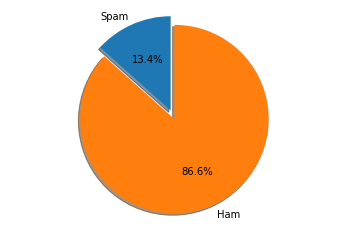

In [213]:
# Pie chart
import matplotlib.pyplot as plt
labels = 'Spam', 'Ham'
sizes = [len(df.loc[df['CATEGORY'] == 'spam']), len(df.loc[df['CATEGORY'] == 'ham'])]
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [214]:
#making sure that the y column has only two possible values
print(df['CATEGORY'].unique())

['ham' 'spam' 'spam ']


In [215]:
df['CATEGORY'] = df['CATEGORY'].str.strip()
print(df['CATEGORY'].unique())

['ham' 'spam']


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


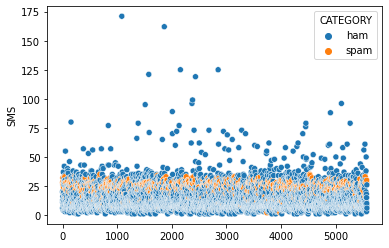

In [216]:
import seaborn as sns
words_len_df = df.copy()
words_len_df['SMS'] = words_len_df['SMS'].apply(lambda sms : len(sms.split(' ')))
sns.scatterplot(range(5574), 'SMS', data=words_len_df, hue='CATEGORY')
plt.show()

In [217]:
X = df['SMS']
y = df['CATEGORY']

In [218]:
#Transforming them to numerical values
y[y == 'spam'] = 1
y[y == 'ham'] = 0
y[:5]

0    0
1    0
2    1
3    0
4    0
Name: CATEGORY, dtype: object

In [219]:
import numpy as np
y = np.asarray(y).astype(int)

In [220]:
print('***** Nr of characters the longest content is: ',
max([len(x) for x in X]))

***** Nr of characters the longest content is:  910


In [221]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
total_words = len(tokenizer.word_index) + 1
total_words

9009

In [222]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [223]:
X = tokenizer.texts_to_sequences(X)
X[3]

[6, 248, 150, 23, 382, 2998, 6, 139, 154, 57, 150]

In [157]:
# pad content based on the longest SMS...
max_SMS_len = max(len(x) for x in X)
print('*****Max words in SMS:', max_SMS_len)

from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=100)
X[2]

*****Max words in SMS: 189


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,   47,  489,    8,   19,    4,  797,  901,    2,
        176, 1941, 1105,  659, 1942, 2331,  261, 2332,   71, 1941,    2,
       1943,    2,  337,  489,  555,  960,   73,  391,  174,  660,  392,
       2997])

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)
print('***** Shape of training samples: ', X_train.shape)
print('***** Shape of testing samples: ', X_test.shape)

***** Shape of training samples:  (4459, 100)
***** Shape of testing samples:  (1115, 100)


In [159]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(9009, 128)) # 128 neurons (columns in Excel)
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(units=1, activation='sigmoid'))

In [160]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [161]:
model.fit(X_train, y_train,
          batch_size=16,
          epochs=3,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/3
279/279 [==============================] - 66s 214ms/step - loss: 0.1219 - accuracy: 0.9601 - val_loss: 0.0530 - val_accuracy: 0.9812
Epoch 2/3
279/279 [==============================] - 58s 209ms/step - loss: 0.0225 - accuracy: 0.9939 - val_loss: 0.0418 - val_accuracy: 0.9865
Epoch 3/3
279/279 [==============================] - 64s 228ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0532 - val_accuracy: 0.9874


In [162]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=32,
                            verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

35/35 - 1s - loss: 0.0532 - accuracy: 0.9874 - 1s/epoch - 39ms/step
Test score: 0.05318320170044899
Test accuracy: 0.9874439239501953


In [163]:
new_SMS = "I am tired of doing the same things every day"
new_SMS = tokenizer.texts_to_sequences([new_SMS])
new_SMS = pad_sequences(new_SMS, maxlen=100)

In [164]:
result = model.predict(new_SMS)
isSpam = result[0][0] > 0.5
print('Is SMS spam? ', isSpam)

Is SMS spam?  False


In [225]:
new_SPAM = "Special price 4 U, send hot to 22222 or STOP to 85858"
new_SPAM = tokenizer.texts_to_sequences([new_SPAM])
#print(new_SPAM)
new_SPAM = pad_sequences(new_SPAM, maxlen=100)
result = model.predict(new_SPAM)
isSpam = result[0][0] > 0.5
print('Is SPAM spam? ', isSpam)

Is SPAM spam?  True


In [166]:
model.save("model.h5")